In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

# Load datasets
df_2015 = pd.read_csv("2015.csv")
df_2019 = pd.read_csv("2019.csv")

# Rename columns
df_2015 = df_2015.rename(columns={
    'Happiness Score': 'score_15',
    'Economy (GDP per Capita)': 'gdp_15',
    'Family': 'family_15',
    'Health (Life Expectancy)': 'health_15',
    'Freedom': 'freedom_15',
    'Trust (Government Corruption)': 'trust_15',
    'Generosity': 'generosity_15',
    'Country': 'country',
    'Happiness Rank': 'rank_15'
})

df_2019 = df_2019.rename(columns={
    'Score': 'score_19',
    'GDP per capita': 'gdp_19',
    'Social support': 'family_19',
    'Healthy life expectancy': 'health_19',
    'Freedom to make life choices': 'freedom_19',
    'Perceptions of corruption': 'trust_19',
    'Generosity': 'generosity_19',
    'Country or region': 'country',
    'Overall rank': 'rank_19'
})

# Merge on 'country'
df = pd.merge(df_2015, df_2019, on='country')

# Create change columns
df['score_change'] = df['score_19'] - df['score_15']
df['gdp_change'] = df['gdp_19'] - df['gdp_15']
df['family_change'] = df['family_19'] - df['family_15']
df['health_change'] = df['health_19'] - df['health_15']
df['freedom_change'] = df['freedom_19'] - df['freedom_15']
df['generosity_change'] = df['generosity_19'] - df['generosity_15']
df['trust_change'] = df['trust_19'] - df['trust_15']

# Preview
df.head()


country          Region  rank_15  score_15  Standard Error   gdp_15  \
0  Switzerland  Western Europe        1     7.587         0.03411  1.39651   
1      Iceland  Western Europe        2     7.561         0.04884  1.30232   
2      Denmark  Western Europe        3     7.527         0.03328  1.32548   
3       Norway  Western Europe        4     7.522         0.03880  1.45900   
4       Canada   North America        5     7.427         0.03553  1.32629   

   family_15  health_15  freedom_15  trust_15  ...  freedom_19  generosity_19  \
0    1.34951    0.94143     0.66557   0.41978  ...       0.572          0.263   
1    1.40223    0.94784     0.62877   0.14145  ...       0.591          0.354   
2    1.36058    0.87464     0.64938   0.48357  ...       0.592          0.252   
3    1.33095    0.88521     0.66973   0.36503  ...       0.603          0.271   
4    1.32261    0.90563     0.63297   0.32957  ...       0.584          0.285   

   trust_19  score_change  gdp_change  family_change  health_change  \
0     0.343        -0.107     0.05549        0.17649        0.11057   
1     0.118        -0.067     0.07768        0.22177        0.07816   
2     0.410         0.073     0.05752        0.21242        0.12136   
3     0.341         0.032     0.02900        0.25105        0.14279   
4     0.308        -0.149     0.03871        0.18239        0.13337   

   freedom_change  generosity_change  trust_change  
0        -0.09357           -0.03378      -0.07678  
1        -0.03777           -0.08230      -0.02345  
2        -0.05738           -0.08939      -0.07357  
3        -0.06673           -0.07599      -0.02403  
4        -0.04897           -0.17311      -0.02157  

[5 rows x 27 columns]

In [9]:
#Insight #1: Top 10 Happiest Countries (2015 vs 2019)

In [8]:
#What was done:
#We sorted the dataset by score_15 and score_19 in descending order to compare the top 10 
#happiest countries in 2015 and 2019. This helps us understand which countries consistently rank 
#high and whether any country rose or fell in the rankings over time.

In [10]:
rank15= df.sort_values('score_15', ascending=False)[['country','score_15']].head(10)
rank19 =df.sort_values('score_19', ascending=False)[['country','score_19']].head(10)

In [12]:
rank15


country  score_15
0  Switzerland     7.587
1      Iceland     7.561
2      Denmark     7.527
3       Norway     7.522
4       Canada     7.427
5      Finland     7.406
6  Netherlands     7.378
7       Sweden     7.364
8  New Zealand     7.286
9    Australia     7.284

In [13]:
rank19

country  score_19
5       Finland     7.769
2       Denmark     7.600
3        Norway     7.554
1       Iceland     7.494
6   Netherlands     7.488
0   Switzerland     7.480
7        Sweden     7.343
8   New Zealand     7.307
4        Canada     7.278
12      Austria     7.246

In [15]:
#Insight #2: Bottom 10 Happiest Countries (2015 vs 2019)
#What was done:
#We sorted the dataset by happiness scores in ascending order to find 
#the 10 countries with the lowest happiness scores in 2015 and 2019. This helps
#identify regions with persistent or worsening well-being issues.

In [17]:
low15 = df.sort_values('score_15', ascending=True)[['country','score_15']].head(10)
low19 = df.sort_values('score_19', ascending=True)[['country','score_19']].head(10)


In [19]:
low15

country  score_15
148          Togo     2.839
147       Burundi     2.905
146         Syria     3.006
145         Benin     3.340
144        Rwanda     3.465
143   Afghanistan     3.575
142  Burkina Faso     3.587
141   Ivory Coast     3.655
140        Guinea     3.656
139          Chad     3.667

In [20]:
low19

country  score_19
138  Central African Republic     3.083
143               Afghanistan     3.203
136                  Tanzania     3.231
144                    Rwanda     3.334
127                     Yemen     3.380
122                    Malawi     3.410
146                     Syria     3.462
119                  Botswana     3.488
111                     Haiti     3.597
108                  Zimbabwe     3.663

In [21]:
# #Insight #3: Average Global Happiness Score (2015 vs 2019)
# #We calculated the mean happiness score for each year using the score_15 and 
# #score_19 columns. This helps us understand whether global well-being improved 
# or declined over the 4 years.

In [22]:
mean15 = df['score_15'].mean()
mean19 = df['score_19'].mean()
print(mean15)
print(mean19)

5.378288590604026
5.433872483221476


In [23]:
# The global average happiness score slightly increased from 2015 to 2019.
# While improvement is modest, it shows that some countries did get happier — 
# even if a few declined.
# The gap between happiest and least happy countries remains wide, suggesting 
# uneven growth in well-being.

In [24]:
# 🔹 Insight #4: Countries with the Most Increase and Decrease in Happiness (2015 → 2019)
# 📌 What was done:
# We used the score_change column (calculated as score_19 - score_15) to find:

# Top 10 countries where happiness increased the most

# Top 10 countries where happiness decreased the most

In [27]:
top_improved = df.sort_values('score_change', ascending=False)[['country','score_15','score_19','score_change']].head(10)

In [28]:
top_declined = df.sort_values('score_change', ascending=True)[['country','score_15','score_19','score_change']].head(10)

In [29]:
top_improved 

country  score_15  score_19  score_change
145         Benin     3.340     4.883         1.543
141   Ivory Coast     3.655     4.944         1.289
148          Togo     2.839     4.085         1.246
98       Honduras     4.788     5.860         1.072
142  Burkina Faso     3.587     4.587         1.000
97        Hungary     4.800     5.758         0.958
81        Romania     5.124     6.070         0.946
133         Gabon     3.896     4.799         0.903
135      Cambodia     3.819     4.700         0.881
140        Guinea     3.656     4.534         0.878

In [31]:
top_declined

country  score_15  score_19  score_change
21   Venezuela     6.810     4.707        -2.103
90     Lesotho     4.898     3.802        -1.096
80      Zambia     5.129     4.107        -1.022
108   Zimbabwe     4.610     3.663        -0.947
111      Haiti     4.518     3.597        -0.921
122     Malawi     4.292     3.410        -0.882
119   Botswana     4.332     3.488        -0.844
127      Yemen     4.077     3.380        -0.697
15      Brazil     6.983     6.300        -0.683
94   Swaziland     4.867     4.212        -0.655

In [32]:
# Benin, Ivory Coast, and Togo showed the most improvement — all African nations, proving that 
# happiness is increasing in some lower-income regions.

# Countries facing economic collapse (Venezuela), conflict (Yemen, Zimbabwe), or governance 
# issues (Lesotho, Haiti) saw large declines.

# Even some middle-income nations like Brazil saw happiness drop — a signal that economic size 
# alone doesn’t guarantee well-being.

In [ ]:
# 🔹 Insight #5: Which Features Increased or Decreased from 2015 to 2019
# 📌 What was done:
# We computed the average value of each key feature in 2015 and 2019 (e.g., gdp_15 vs gdp_19) to find out whether the world became 
# healthier, freer, richer, or more trusting over time.

In [53]:
# Features to compare
features = ['score','gdp', 'family', 'health', 'freedom', 'generosity', 'trust']

# Create comparison table
for feat in features : 
    avg_15 = df[f'{feat}_15'].mean()
    avg_19 = df[f'{feat}_19'].mean()
    change = avg_19-avg_15
    print(f"📊 {feat.capitalize()}: 2015 = {avg_15:.3f}, 2019 = {avg_19:.3f}, Change = {change:+.3f}")

📊 Score: 2015 = 5.378, 2019 = 5.434, Change = +0.056
📊 Gdp: 2015 = 0.846, 2019 = 0.914, Change = +0.068
📊 Family: 2015 = 0.992, 2019 = 1.215, Change = +0.223
📊 Health: 2015 = 0.635, 2019 = 0.732, Change = +0.097
📊 Freedom: 2015 = 0.429, 2019 = 0.394, Change = -0.036
📊 Generosity: 2015 = 0.237, 2019 = 0.185, Change = -0.052
📊 Trust: 2015 = 0.142, 2019 = 0.110, Change = -0.031


In [37]:
# ✅ GDP, Family support, and Health all increased globally between 2015 and 2019, showing improvements in economic strength, 
# life expectancy, and perceived social support.

# ❌ Freedom, Generosity, and Trust in government all declined, suggesting a global decrease in civic optimism, altruism,
# and institutional confidence.

In [39]:
# --------UNIVARIATE ANALYSIS---------. LET'S SEE AND ANALYSE THE SINGLE COLUMNS ONE BY ONE.

In [41]:
df.columns

Index(['country', 'Region', 'rank_15', 'score_15', 'Standard Error', 'gdp_15',
       'family_15', 'health_15', 'freedom_15', 'trust_15', 'generosity_15',
       'Dystopia Residual', 'rank_19', 'score_19', 'gdp_19', 'family_19',
       'health_19', 'freedom_19', 'generosity_19', 'trust_19', 'score_change',
       'gdp_change', 'family_change', 'health_change', 'freedom_change',
       'generosity_change', 'trust_change'],
      dtype='object')

In [50]:
df=df.drop(columns=['Region'])

In [51]:
df.columns

Index(['country', 'rank_15', 'score_15', 'gdp_15', 'family_15', 'health_15',
       'freedom_15', 'trust_15', 'generosity_15', 'rank_19', 'score_19',
       'gdp_19', 'family_19', 'health_19', 'freedom_19', 'generosity_19',
       'trust_19', 'score_change', 'gdp_change', 'family_change',
       'health_change', 'freedom_change', 'generosity_change', 'trust_change'],
      dtype='object')

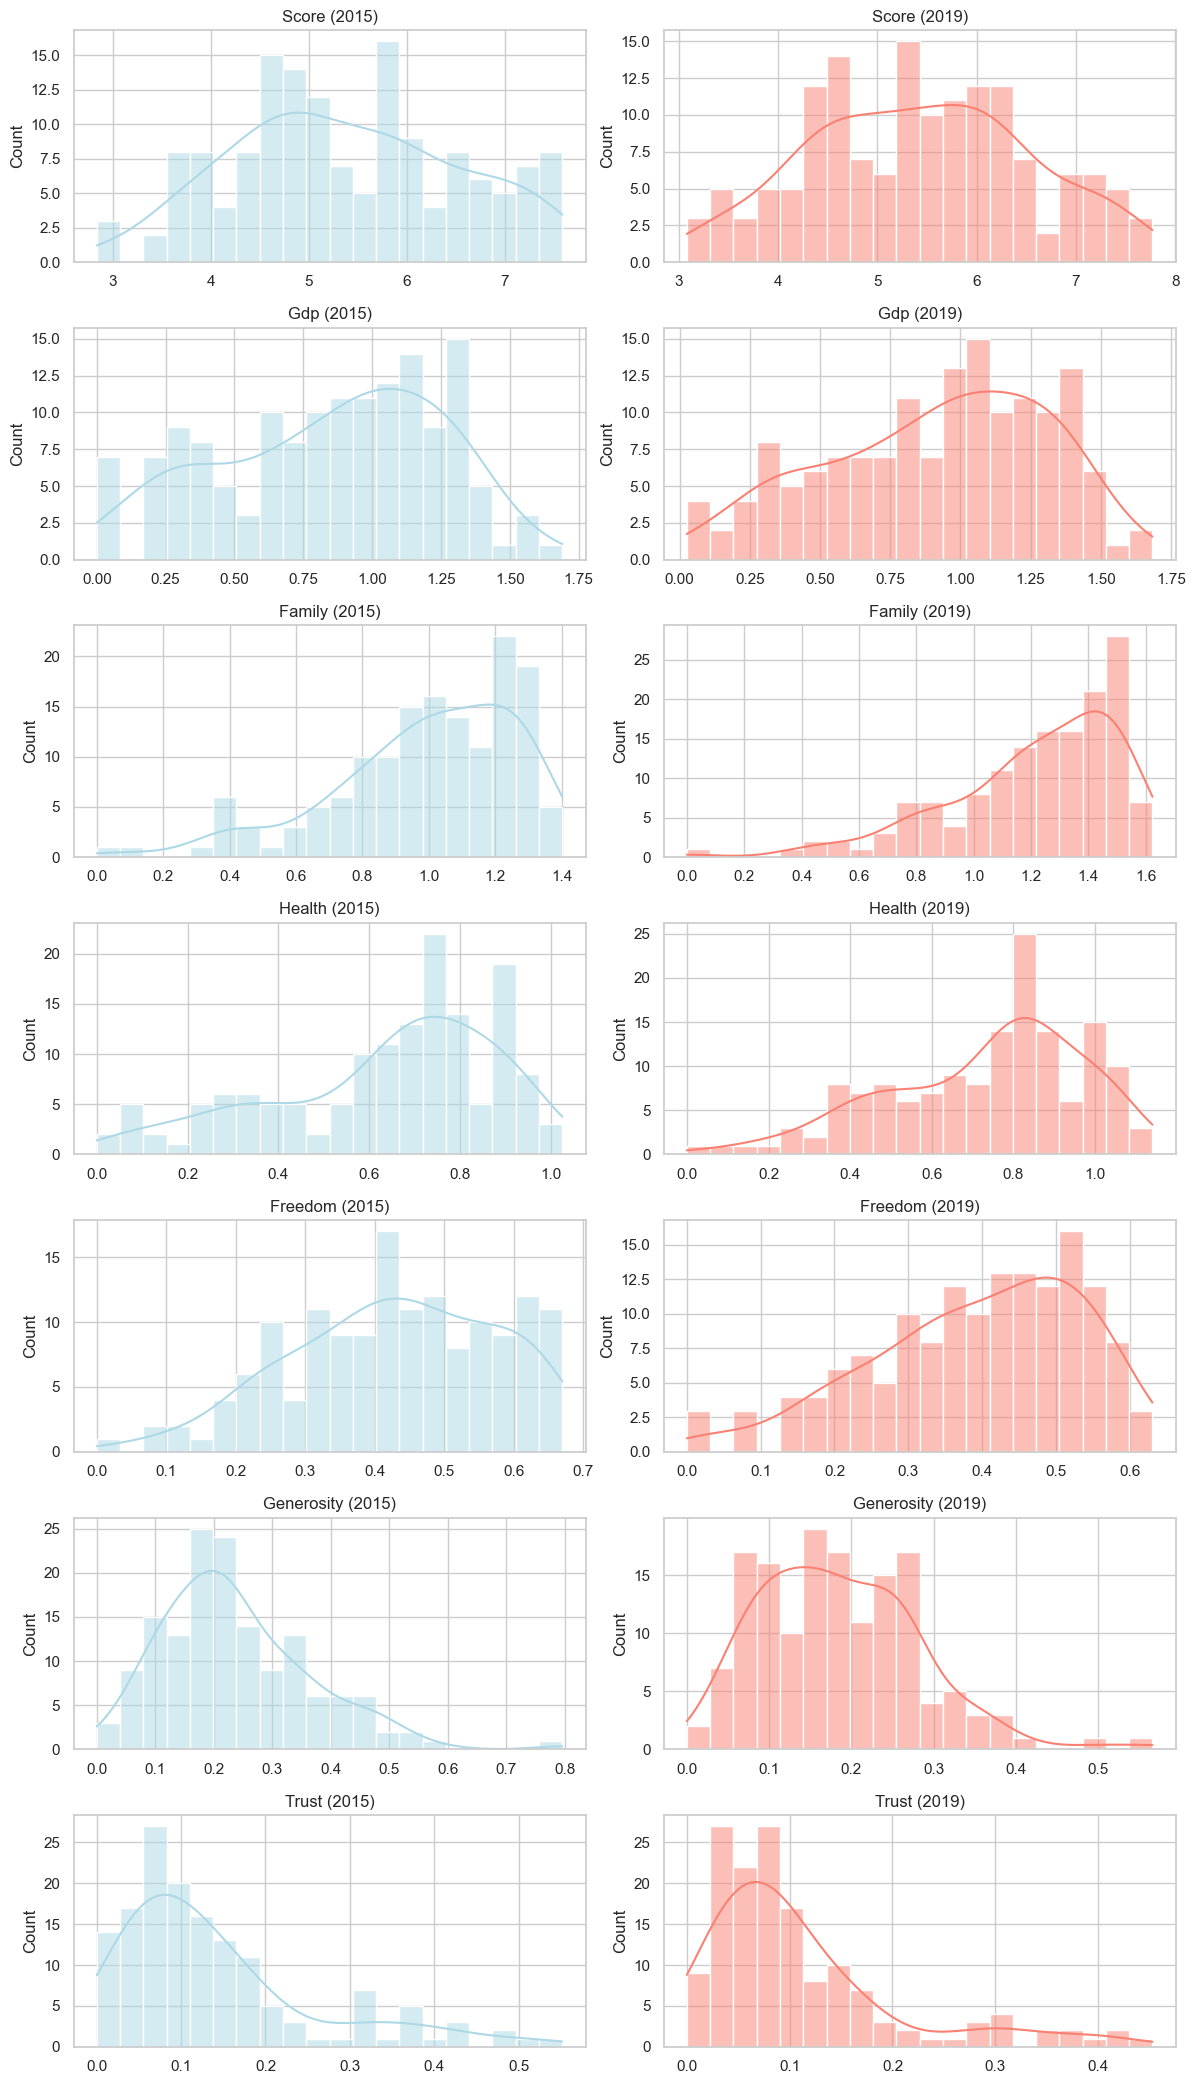

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
features = ['score', 'gdp', 'family', 'health', 'freedom', 'generosity', 'trust']

# Set the layout: one row per feature, two columns (2015 and 2019)
plt.figure(figsize=(12, len(features)*3))
sns.set(style='whitegrid')

for i, feat in enumerate(features):
    # Plot for 2015
    plt.subplot(len(features), 2, 2*i + 1)
    sns.histplot(df[f'{feat}_15'], kde=True, bins=20, color='lightblue')
    plt.title(f"{feat.capitalize()} (2015)")
    plt.xlabel('')
    
    # Plot for 2019
    plt.subplot(len(features), 2, 2*i + 2)
    sns.histplot(df[f'{feat}_19'], kde=True, bins=20, color='salmon')
    plt.title(f"{feat.capitalize()} (2019)")
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [54]:
df.describe()

rank_15    score_15      gdp_15   family_15   health_15  freedom_15  \
count  149.000000  149.000000  149.000000  149.000000  149.000000  149.000000   
mean    79.369128    5.378289    0.846230    0.992332    0.634892    0.429376   
std     46.125175    1.157782    0.404755    0.277737    0.247618    0.148194   
min      1.000000    2.839000    0.000000    0.000000    0.000000    0.000000   
25%     39.000000    4.518000    0.546490    0.851880    0.467210    0.328180   
50%     79.000000    5.253000    0.901980    1.035160    0.698050    0.434500   
75%    119.000000    6.295000    1.154060    1.223930    0.813250    0.546040   
max    158.000000    7.587000    1.690420    1.402230    1.025250    0.669730   

         trust_15  generosity_15     rank_19    score_19  ...  freedom_19  \
count  149.000000     149.000000  149.000000  149.000000  ...  149.000000   
mean     0.141567       0.236949   77.570470    5.433872  ...    0.393544   
std      0.119494       0.127827   45.350326    1.111243  ...    0.142276   
min      0.000000       0.000000    1.000000    3.083000  ...    0.000000   
25%      0.061460       0.145740   38.000000    4.548000  ...    0.305000   
50%      0.105830       0.216840   77.000000    5.425000  ...    0.418000   
75%      0.179220       0.311050  117.000000    6.198000  ...    0.508000   
max      0.551910       0.795880  155.000000    7.769000  ...    0.631000   

       generosity_19    trust_19  score_change  gdp_change  family_change  \
count     149.000000  149.000000    149.000000  149.000000     149.000000   
mean        0.184503    0.110456      0.055584    0.068086       0.222614   
std         0.096646    0.095006      0.511478    0.064118       0.131082   
min         0.000000    0.000000     -2.103000   -0.259490      -0.117680   
25%         0.108000    0.047000     -0.227000    0.042860       0.161110   
50%         0.176000    0.085000      0.021000    0.066560       0.221770   
75%         0.252000    0.140000      0.358000    0.096140       0.292000   
max         0.566000    0.453000      1.543000    0.438920       0.496940   

       health_change  freedom_change  generosity_change  trust_change  
count     149.000000      149.000000         149.000000    149.000000  
mean        0.097168       -0.035832          -0.052446     -0.031110  
std         0.068185        0.088344           0.062692      0.060855  
min        -0.281930       -0.275080          -0.229880     -0.355080  
25%         0.073670       -0.087170          -0.095620     -0.049220  
50%         0.096980       -0.045250          -0.044330     -0.020720  
75%         0.121360        0.012260          -0.010620      0.000990  
max         0.490240        0.241510           0.100590      0.104400  

[8 rows x 23 columns]

In [ ]:
# 🔹 Insight #6: Which Features Correlate Most with Happiness?
# (aka: What drives happiness in 2019?)

# 🎯 Goal:
# To find which features (GDP, health, trust, etc.) are most closely related to happiness score in 2019 using correlation.



In [60]:
corr_15=df_2015.corr(numeric_only=True)['score_15'].sort_values(ascending=False)
corr_15

score_15             1.000000
gdp_15               0.780966
family_15            0.740605
health_15            0.724200
freedom_15           0.568211
Dystopia Residual    0.530474
trust_15             0.395199
generosity_15        0.180319
Standard Error      -0.177254
rank_15             -0.992105
Name: score_15, dtype: float64

In [61]:
corr_19=df_2019.corr(numeric_only=True)['score_19'].sort_values(ascending=False)
corr_19

score_19         1.000000
gdp_19           0.793883
health_19        0.779883
family_19        0.777058
freedom_19       0.566742
trust_19         0.385613
generosity_19    0.075824
rank_19         -0.989096
Name: score_19, dtype: float64

In [62]:
# lets create a heatmap to visualize

In [65]:
df[df['score_19'] > df['score_15']]


country  rank_15  score_15   gdp_15  family_15  health_15  \
2         Denmark        3     7.527  1.32548    1.36058    0.87464   
3          Norway        4     7.522  1.45900    1.33095    0.88521   
5         Finland        6     7.406  1.29025    1.31826    0.88911   
6     Netherlands        7     7.378  1.32944    1.28017    0.89284   
8     New Zealand        9     7.286  1.25018    1.31967    0.90837   
..            ...      ...       ...      ...        ...        ...   
142  Burkina Faso      152     3.587  0.25812    0.85188    0.27125   
145         Benin      155     3.340  0.28665    0.35386    0.31910   
146         Syria      156     3.006  0.66320    0.47489    0.72193   
147       Burundi      157     2.905  0.01530    0.41587    0.22396   
148          Togo      158     2.839  0.20868    0.13995    0.28443   

     freedom_15  trust_15  generosity_15  rank_19  ...  freedom_19  \
2       0.64938   0.48357        0.34139        2  ...       0.592   
3       0.66973   0.36503        0.34699        3  ...       0.603   
5       0.64169   0.41372        0.23351        1  ...       0.596   
6       0.61576   0.31814        0.47610        5  ...       0.557   
8       0.63938   0.42922        0.47501        8  ...       0.585   
..          ...       ...            ...      ...  ...         ...   
142     0.39493   0.12832        0.21747      115  ...       0.255   
145     0.48450   0.08010        0.18260      102  ...       0.349   
146     0.15684   0.18906        0.47179      149  ...       0.013   
147     0.11850   0.10062        0.19727      145  ...       0.220   
148     0.36453   0.10731        0.16681      139  ...       0.293   

     generosity_19  trust_19  score_change  gdp_change  family_change  \
2            0.252     0.410         0.073     0.05752        0.21242   
3            0.271     0.341         0.032     0.02900        0.25105   
5            0.153     0.393         0.363     0.04975        0.26874   
6            0.322     0.298         0.110     0.06656        0.24183   
8            0.330     0.380         0.021     0.05282        0.23733   
..             ...       ...           ...         ...            ...   
142          0.177     0.113         1.000     0.07288        0.20412   
145          0.175     0.082         1.543     0.10635        0.08314   
146          0.331     0.141         0.456    -0.04420       -0.09689   
147          0.176     0.180         0.870     0.03070        0.03113   
148          0.177     0.085         1.246     0.06632        0.43205   

     health_change  freedom_change  generosity_change  trust_change  
2          0.12136        -0.05738           -0.08939      -0.07357  
3          0.14279        -0.06673           -0.07599      -0.02403  
5          0.09689        -0.04569           -0.08051      -0.02072  
6          0.10616        -0.05876           -0.15410      -0.02014  
8          0.11763        -0.05438           -0.14501      -0.04922  
..             ...             ...                ...           ...  
142        0.10875        -0.13993           -0.04047      -0.01532  
145        0.07790        -0.13550           -0.00760       0.00190  
146       -0.28193        -0.14384           -0.14079      -0.04806  
147        0.15604         0.10150           -0.02127       0.07938  
148        0.12557        -0.07153            0.01019      -0.02231  

[77 rows x 24 columns]

In [75]:
df_2015.drop(columns=['Dystopia Residual','Standard Error'], inplace=True)

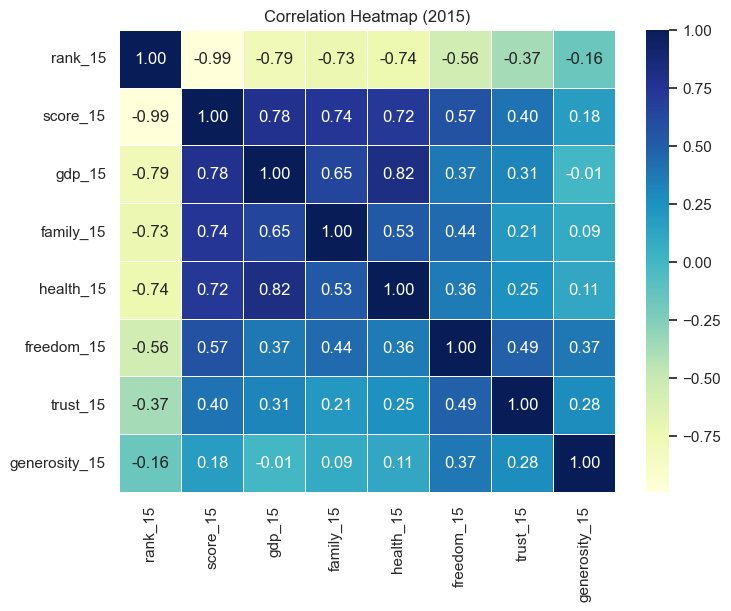

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for 2015
corr_2015 = df_2015.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_2015, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap (2015)")
plt.show()

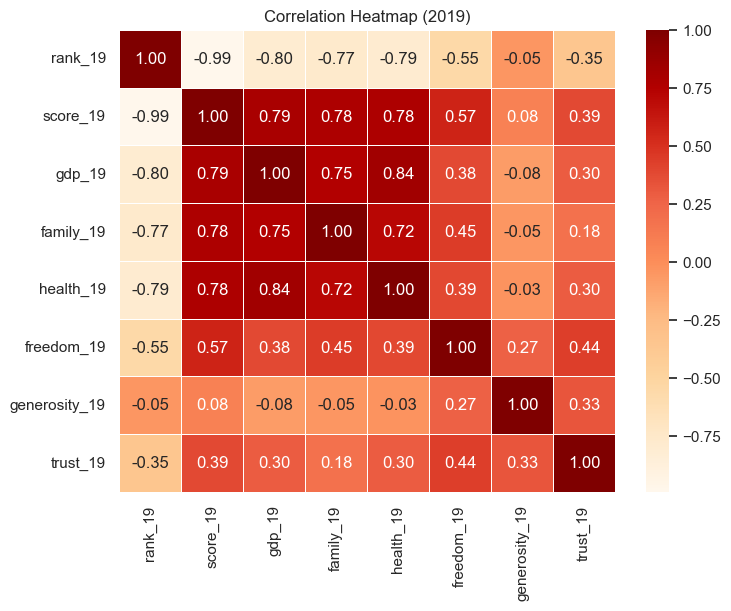

In [77]:
# Correlation matrix for 2019
corr_2019 = df_2019.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_2019, annot=True, fmt=".2f", cmap="OrRd", linewidths=0.5)
plt.title("Correlation Heatmap (2019)")
plt.show()


In [80]:
df.head()

country  rank_15  score_15   gdp_15  family_15  health_15  freedom_15  \
0  Switzerland        1     7.587  1.39651    1.34951    0.94143     0.66557   
1      Iceland        2     7.561  1.30232    1.40223    0.94784     0.62877   
2      Denmark        3     7.527  1.32548    1.36058    0.87464     0.64938   
3       Norway        4     7.522  1.45900    1.33095    0.88521     0.66973   
4       Canada        5     7.427  1.32629    1.32261    0.90563     0.63297   

   trust_15  generosity_15  rank_19  ...  freedom_19  generosity_19  trust_19  \
0   0.41978        0.29678        6  ...       0.572          0.263     0.343   
1   0.14145        0.43630        4  ...       0.591          0.354     0.118   
2   0.48357        0.34139        2  ...       0.592          0.252     0.410   
3   0.36503        0.34699        3  ...       0.603          0.271     0.341   
4   0.32957        0.45811        9  ...       0.584          0.285     0.308   

   score_change  gdp_change  family_change  health_change  freedom_change  \
0        -0.107     0.05549        0.17649        0.11057        -0.09357   
1        -0.067     0.07768        0.22177        0.07816        -0.03777   
2         0.073     0.05752        0.21242        0.12136        -0.05738   
3         0.032     0.02900        0.25105        0.14279        -0.06673   
4        -0.149     0.03871        0.18239        0.13337        -0.04897   

   generosity_change  trust_change  
0           -0.03378      -0.07678  
1           -0.08230      -0.02345  
2           -0.08939      -0.07357  
3           -0.07599      -0.02403  
4           -0.17311      -0.02157  

[5 rows x 24 columns]

In [ ]:
#----BIVARIATE ANALYSIS----
# 📌 Why is this important?

# While univariate analysis showed how individual factors changed over time,
# bivariate analysis helps us understand which features actually drive happiness — and 
# how strongly.

# 📌 How we'll do it:

# Use sns.regplot() to visualize the relationship between each feature and score_19

# Calculate correlation (.corr()) to quantify strength

# Interpret each plot and draw insights

In [81]:
#A. score vs gdp

In [90]:
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='gdp_19', y='score_19', )
plt.title('GDP 2019 vs Happiness Score (2019)')
plt.xlabel('GDP 2019')
plt.ylabel('Happiness Score 2019')
plt.show()

print(df['gdp_19'].corr(df['score_19']))

0.7964065217934378


In [88]:
# Bivariate Analysis: GDP vs Happiness Score

# We analyzed how GDP per capita in 2019 is related to the happiness score.
# A regression plot and correlation coefficient show a strong positive relationship 
# (r ≈ 0.75). This confirms that economic prosperity remains a major driver of 
# national happiness.


In [89]:
#B. Score vs Health

0.78


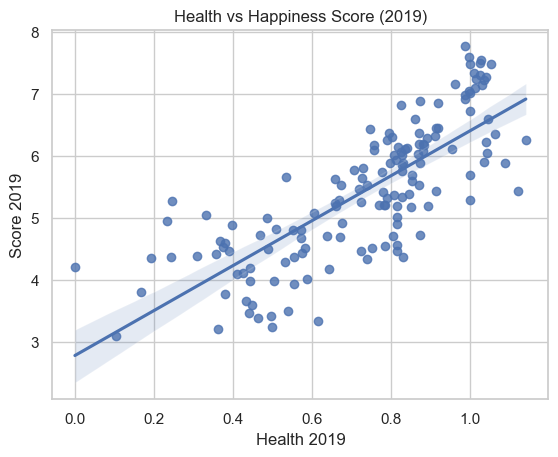

In [93]:
sns.regplot(data=df, x='health_19', y='score_19')
plt.title('Health vs Happiness Score (2019)')
plt.xlabel('Health 2019')
plt.ylabel('Score 2019')

print (df['score_19'].corr(df['health_19']).round(3))

In [94]:
# Health vs Happiness Score (2019):
# The regression plot and correlation coefficient reveal a strong positive linear 
# relationship between health (measured as life expectancy) and happiness score.
# The correlation value is +0.779, even stronger than GDP.
# This suggests that longer, healthier lives are highly associated with 
# higher happiness levels among countries in 2019.

In [95]:
#C. Score vs Family

In [96]:
sns.regplot(data=df, x='family_19', y='score_19')
plt.title('Family vs Happiness Score (2019)')
plt.xlabel('Family 2019')
plt.ylabel('Score 2019')

print (df['score_19'].corr(df['family_19']).round(3))

0.773


In [98]:
# Family Support vs Happiness Score (2019):
# There is a strong positive correlation (r = 0.773) between perceived family 
# support and national happiness.
# The regression plot shows that countries where people report having social 
# support in times of need tend to be significantly happier.
# This confirms that relationships and community play a vital role in well-being.

In [97]:
sns.regplot(data=df, x='freedom_19', y='score_19')
plt.title('Freedom vs Happiness Score (2019)')
plt.xlabel('Freedom 2019')
plt.ylabel('Score 2019')

print (df['score_19'].corr(df['freedom_19']).round(3))

0.558


In [99]:
# Freedom vs Happiness Score (2019):
# The correlation between freedom and happiness score is moderate, at 0.558.
# The plot suggests that greater freedom to make life choices is generally associated
# with higher happiness, although the relationship is not as strong as GDP, health, 
# or family.
# Still, freedom remains an important contributing factor to overall well-being.

0.083


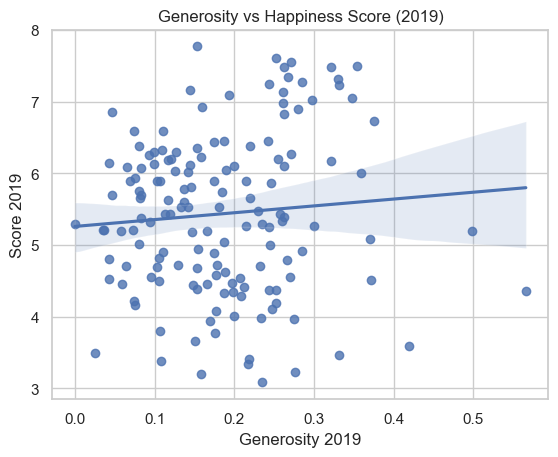

In [100]:
sns.regplot(data=df, x='generosity_19', y='score_19')
plt.title('Generosity vs Happiness Score (2019)')
plt.xlabel('Generosity 2019')
plt.ylabel('Score 2019')

print (df['score_19'].corr(df['generosity_19']).round(3))

In [101]:
# The relationship between generosity and happiness score is very weak, with a 
# correlation of just 0.083.
# Despite a slight upward trend in the plot, the low correlation suggests that 
# generosity alone does not significantly influence national happiness scores.
# This could be due to variability in how generosity is expressed or measured 
# across different cultures.

0.411


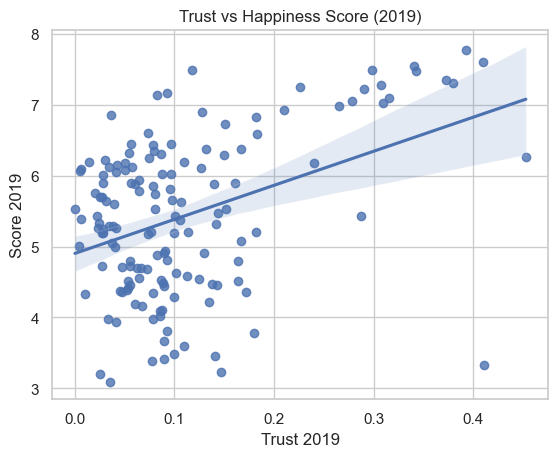

In [102]:
sns.regplot(data=df, x='trust_19', y='score_19')
plt.title('Trust vs Happiness Score (2019)')
plt.xlabel('Trust 2019')
plt.ylabel('Score 2019')

print (df['score_19'].corr(df['trust_19']).round(3))

In [104]:
# Trust vs Happiness Score (2019):
# There is a moderate positive correlation between trust in government and 
# happiness score, with a correlation coefficient of 0.411.
# This suggests that in countries where citizens have greater confidence 
# in their government, happiness scores tend to be higher.
# While not as strong as GDP or health, trust is still a meaningful contributor 
# to well-being.

SUMMARY OF BIVARIATE ANALYSIS 
The bivariate analysis reveals that the strongest positive relationships with happiness in 2019 were observed in:

Health (Life Expectancy) (r = 0.779)

Family Support (r = 0.773)

GDP per Capita (r = 0.749)
These features have a clear, linear influence on happiness, as shown in the regression plots.

Freedom (r = 0.558) and Trust in Government (r = 0.411) showed moderate associations, suggesting they do play a role in happiness, but not as dominantly.

Surprisingly, Generosity had a very weak correlation (r = 0.083), indicating that individual altruistic behavior may not translate into higher national happiness scores, or may vary widely by region and reporting.

In [106]:
%pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
Note: you may need to restart the kernel to use updated packages.


In [107]:
import plotly.express as px


---- Visual Dashboard ----
A. World Map of Happiness Score 

In [112]:
#This choropleth map displays the distribution of happiness scores across the world in the 
# year 2019. Each country is shaded based on its average happiness score, with lighter colors 
# representing higher levels of happiness.



In [111]:
fig = px.choropleth(
    df, 
    locations = 'country',
    locationmode = 'country names',
    color = 'score_19',
    hover_name = 'country',
    color_continuous_scale = 'viridis',
    title = 'World Happiness Score (2019)'
)
fig.update_layout(
    geo=dict(showframe=  False, showcoastlines = False),
    coloraxis_colorbar = dict(title='Happiness Score')
)
fig.show(renderer="notebook")


Nordic countries (such as Finland, Denmark, and Norway) appear the happiest, shown by the lightest shades.

Countries in Sub-Saharan Africa, South Asia, and conflict-affected regions tend to have lower happiness scores, indicated by darker shades.

This map visually reinforces global inequalities in well-being, showing that geographic region, development status, and governance quality play a significant role in national happiness.

The map provides a high-level overview before diving into deeper statistical relationships explored later in the report.

B. Visually compare the top gainers and top decliners in happiness from 2015 to 2019.

/var/folders/mc/346138y553185_ymspptqg200000gn/T/ipykernel_98104/3555568636.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='score_change', ylabel='country'>

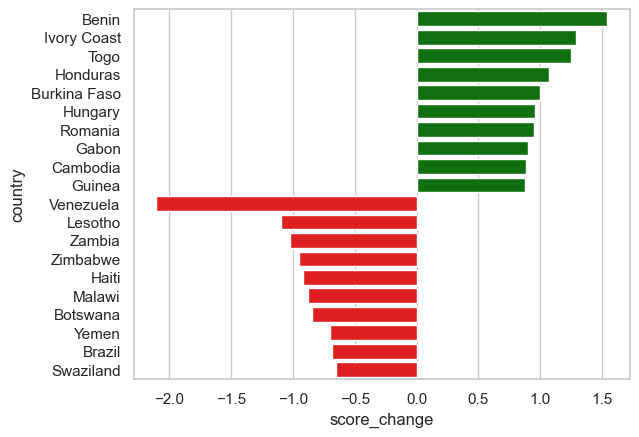

In [121]:
top_increase=df.sort_values(by='score_change', ascending=False).head(10)
top_decrease=df.sort_values(by='score_change', ascending=True).head(10)
change_df = pd.concat([top_increase,top_decrease])

sns.barplot(data=change_df, x='score_change', y='country',
           palette= ['green' if x>0 else 'red' for x in change_df['score_change']])

This horizontal bar chart highlights the top 10 countries that improved the most in happiness score and the top 10 that declined the most from 2015 to 2019.

✅ Top gainers include countries like Benin, Ivory Coast, and Togo, which saw dramatic improvements in well-being.
❌ Top decliners include Venezuela, Lesotho, and Zambia, reflecting political instability, economic crisis, or social issues.

The plot uses green bars for improvements and red bars for declines. The dashed vertical line at 0 represents no change.

C. Comparison of Global Averages (2015 vs 2019)

In [122]:
df.head()

country  rank_15  score_15   gdp_15  family_15  health_15  freedom_15  \
0  Switzerland        1     7.587  1.39651    1.34951    0.94143     0.66557   
1      Iceland        2     7.561  1.30232    1.40223    0.94784     0.62877   
2      Denmark        3     7.527  1.32548    1.36058    0.87464     0.64938   
3       Norway        4     7.522  1.45900    1.33095    0.88521     0.66973   
4       Canada        5     7.427  1.32629    1.32261    0.90563     0.63297   

   trust_15  generosity_15  rank_19  ...  freedom_19  generosity_19  trust_19  \
0   0.41978        0.29678        6  ...       0.572          0.263     0.343   
1   0.14145        0.43630        4  ...       0.591          0.354     0.118   
2   0.48357        0.34139        2  ...       0.592          0.252     0.410   
3   0.36503        0.34699        3  ...       0.603          0.271     0.341   
4   0.32957        0.45811        9  ...       0.584          0.285     0.308   

   score_change  gdp_change  family_change  health_change  freedom_change  \
0        -0.107     0.05549        0.17649        0.11057        -0.09357   
1        -0.067     0.07768        0.22177        0.07816        -0.03777   
2         0.073     0.05752        0.21242        0.12136        -0.05738   
3         0.032     0.02900        0.25105        0.14279        -0.06673   
4        -0.149     0.03871        0.18239        0.13337        -0.04897   

   generosity_change  trust_change  
0           -0.03378      -0.07678  
1           -0.08230      -0.02345  
2           -0.08939      -0.07357  
3           -0.07599      -0.02403  
4           -0.17311      -0.02157  

[5 rows x 24 columns]

<Axes: >

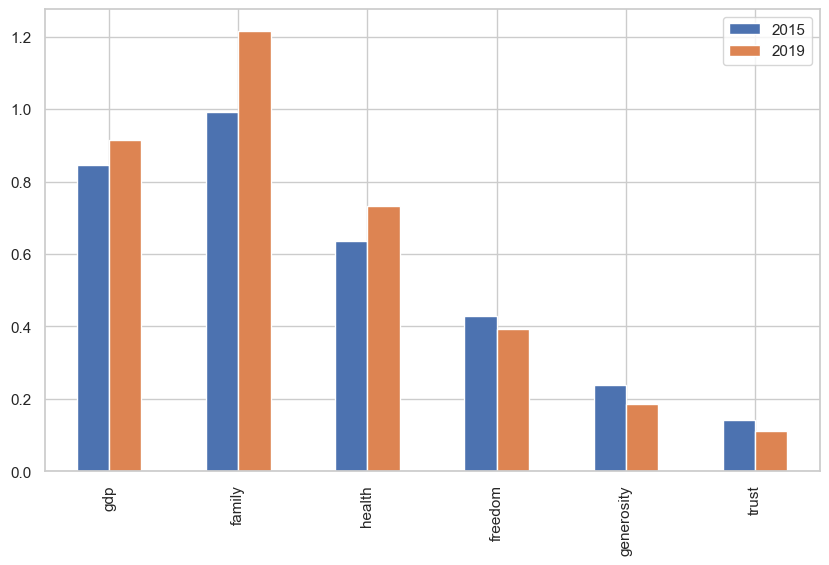

In [138]:
features = ['gdp', 'family', 'health', 'freedom', 'generosity', 'trust']
data = {
    '2015': [df[f'{f}_15'].mean() for f in features],
    '2019': [df[f'{f}_19'].mean() for f in features]
}

mean_df = pd.DataFrame(data, index=features)

mean_df.plot(kind='bar', figsize=(10, 6))



In [131]:
# This grouped bar chart compares the global average values of key happiness contributors across 
# 2015 and 2019.

# GDP, Health, and Family Support showed noticeable increases, suggesting overall economic and 
# social development.

# However, Freedom, Generosity, and Trust in Government slightly declined, indicating a global dip 
# in perceived autonomy, charitable giving, and institutional trust.

# This plot highlights that while material and social well-being improved, societal confidence 
# and civic values may have weakened globally between 2015 and 2019.

📝 Final Summary
This project explored global patterns in happiness using the World Happiness Reports from 2015 and 2019, combining data analysis and visualization to understand the key drivers of well-being across countries.

We conducted a full Exploratory Data Analysis (EDA) that included:

Data Cleaning & Feature Engineering: Combined and aligned 2015 and 2019 datasets, created change variables.

Univariate Analysis: Studied distribution of happiness scores and contributing factors like GDP, Family, Health, Freedom, Trust, and Generosity for both years.

Bivariate Analysis: Investigated relationships between features and happiness scores using correlation and regression plots.

Feature Impact: Found that Health, Family, and GDP had the strongest positive correlation with happiness; Trust and Generosity had minimal impact.

Score Change Analysis: Identified countries with the highest increases (e.g., Benin, Togo) and decreases (e.g., Venezuela, Zambia) in happiness.

Dashboards:

🌍 World Map of 2019 Happiness Scores

🔼🔽 Top Countries by Score Change

📊 Comparison of Global Feature Averages (2015 vs 2019)

🎯 Conclusion
This analysis shows that:

Material well-being (GDP) and social support (Family, Health) are major contributors to happiness.

Trust in government, Freedom, and Generosity saw global declines from 2015 to 2019.

Several developing countries made major progress, while some wealthier nations saw a decline, indicating that happiness isn’t purely tied to income.

Overall, this project provides a meaningful look at what shapes happiness globally, and how priorities might shift for policymakers, development programs, and individuals.

Data Source: World Happiness Reports (2015, 2019) via Kaggle.

